In [ ]:
import pandas as pd
import numpy as np
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars.head(10)
star_wars.columns
star_wars=star_wars[star_wars['RespondentID'].notnull()]

### change valeus to True and False

In [ ]:
yes_no = { "Yes": True, "No": False, np.NaN: False}
star_wars['Have you seen any of the 6 films in the Star Wars franchise?']\
=star_wars['Have you seen any of the 6 films in the Star Wars franchise?']\
.map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film \
franchise?']=star_wars['Do you consider yourself to be a fan of the \
Star Wars film franchise?'].map(yes_no)
star_wars.head(3)

In [ ]:
star_wars.columns

In [ ]:
star_wars['Which of the following Star Wars films have you seen? Please select all that apply.']=star_wars['Which of the following Star Wars films have you seen? Please select all that apply.'].map({'Star Wars: Episode I  The Phantom Menace': True, np.NaN: False})
star_wars['Unnamed: 4']=star_wars['Unnamed: 4'].map({'Star Wars: Episode II  Attack of the Clones': True, np.NaN: False})
star_wars['Unnamed: 5']=star_wars['Unnamed: 5'].map({'Star Wars: Episode III  Revenge of the Sith': True, np.NaN: False})
star_wars['Unnamed: 6']=star_wars['Unnamed: 6'].map({'Star Wars: Episode IV  A New Hope': True, np.NaN: False})
star_wars['Unnamed: 7']=star_wars['Unnamed: 7'].map({'Star Wars: Episode V The Empire Strikes Back': True, np.NaN: False})
star_wars['Unnamed: 8']=star_wars['Unnamed: 8'].map({'Star Wars: Episode VI Return of the Jedi': True, np.NaN: False})
star_wars.head(2)

### rename columns, change data types

In [ ]:
star_wars.columns[3:9]

In [ ]:
star_wars=star_wars.rename(columns={'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1',\
                                    'Unnamed: 4':'seen_2', \
                                    'Unnamed: 5':'seen_3', \
                                    'Unnamed: 6': 'seen_4', \
                                    'Unnamed: 7': 'seen_5', \
                                    'Unnamed: 8': 'seen_6'})
star_wars.head(2)

In [ ]:
# vonverting ranking values to float
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [ ]:
star_wars.columns[9:15]

In [ ]:
star_wars = star_wars.rename(columns={'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',\
                                    'Unnamed: 10': 'ranking_2',\
                                    'Unnamed: 11': 'ranking_3',\
                                    'Unnamed: 12': 'ranking_4',\
                                    'Unnamed: 13': 'ranking_5',\
                                    'Unnamed: 14': 'ranking_6'})

## compute mean, sum and plot both

In [157]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_two(c1, c2):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
    width = 0.3
    
    df=pd.concat([c1, c2], axis=1)
    df=df.rename({0: 'c1', 1: 'c2'}, axis=1)
    df.c1.plot(kind='bar', color='red', ax=ax, width=width, position=1)
    df.c2.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

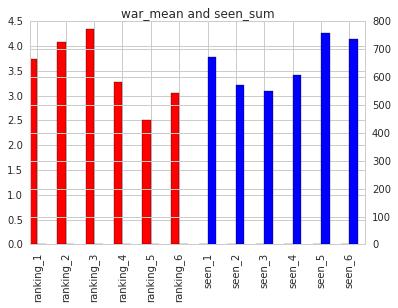

In [158]:
# the mean of each of the ranking columns
war_mean=star_wars.mean()[9:15]
# number of people who have seen the movies
seen_sum=star_wars.sum()[3:9]
plot_two(war_mean, seen_sum)
plt.title('war_mean and seen_sum')

### split and analyze data in different groups

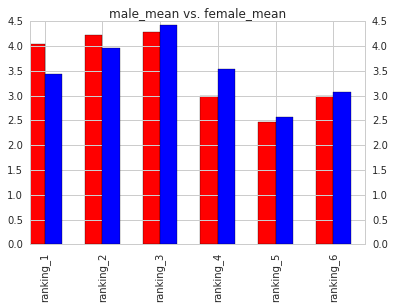

In [159]:
# males vs fefmales
males = star_wars[star_wars['Gender'] == 'Male']
females = star_wars[star_wars['Gender'] == 'Female']
#ranking
male_mean=males.mean()[9:15]
female_mean=females.mean()[9:15]
plot_two(male_mean, female_mean)
plt.title('male_mean vs. female_mean')

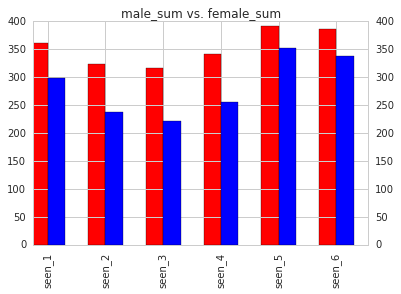

In [160]:
# number of people who have seen the movies
male_sum=males.sum()[3:9]
female_sum=females.sum()[3:9]
plot_two(male_sum, female_sum)
plt.title('male_sum vs. female_sum')

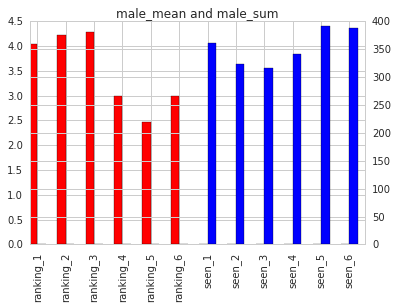

In [161]:
plot_two(male_mean, male_sum)
plt.title('male_mean and male_sum')

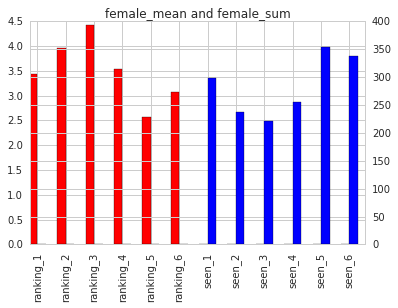

In [162]:
plot_two(female_mean, female_sum)
plt.title('female_mean and female_sum')

### StarWars fans/nonfans vs. StarTrek fans/nonfans

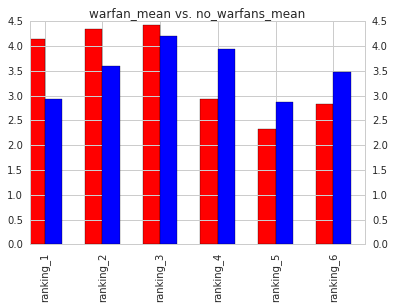

In [165]:
warfans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
no_warfans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == False]
# ranking
warfan_mean=warfans.mean()[9:15]
no_warfans_mean=no_warfans.mean()[9:15]
plot_two(warfan_mean, no_warfans_mean)
plt.title('warfan_mean vs. no_warfans_mean')

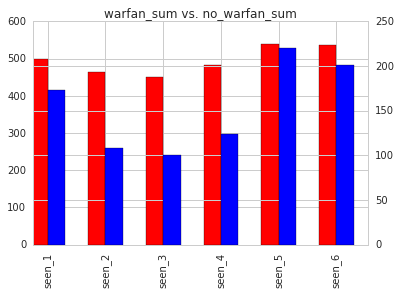

In [167]:
# number of people who watched StarWars movies
warfan_sum= warfans.sum()[3:9]
no_warfan_sum= no_warfans.sum()[3:9]
plot_two(warfan_sum, no_warfan_sum)
plt.title('warfan_sum vs. no_warfan_sum')

In [199]:
age_mean = star_wars.groupby('Age').mean()
age_mean

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
Age,,,,,,,,,,,,,,,
18-29,3.290464e+09,0.825688,0.568807,0.733945,0.678899,0.665138,0.697248,0.733945,0.733945,4.100000,4.100000,3.966667,2.994444,2.722222,3.116667
30-44,3.290218e+09,0.772388,0.559701,0.652985,0.589552,0.567164,0.656716,0.735075,0.735075,4.347826,4.309179,4.475728,2.932367,2.212560,2.714976
45-60,3.289923e+09,0.824742,0.529210,0.621993,0.508591,0.487973,0.567010,0.756014,0.721649,3.541667,4.170833,4.537500,3.308333,2.437500,3.004167
> 60,3.290001e+09,0.717472,0.420074,0.531599,0.394052,0.371747,0.386617,0.624535,0.587361,3.010417,3.761658,4.316062,3.808290,2.730570,3.357513


/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


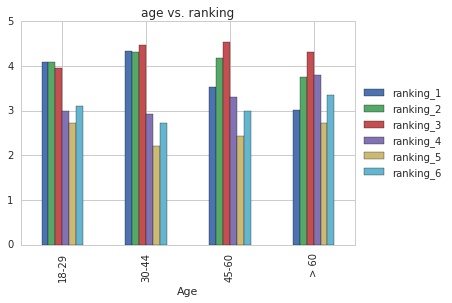

In [212]:
age_mean.plot.bar(y=['ranking_1','ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6'])
plt.title('age vs. ranking')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


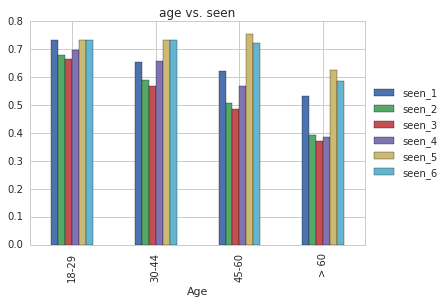

In [213]:
age_mean.plot.bar(y=['seen_1','seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'])
plt.title('age vs. seen')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

None
